In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ISLR)
library(GGally)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [21]:
#Loading the Dataset
url <- "https://raw.githubusercontent.com/Zitong06/data/refs/heads/main/players.csv"
players_original <- read_csv(url)
players_na.rm <- na.omit(players_original)
players_fac <- players_na.rm |>
        mutate(experience = factor(experience),
        gender = factor(gender))
players_fac
summary(players_fac)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


    experience subscribe       hashedEmail         played_hours    
 Amateur :63   Mode :logical   Length:194         Min.   :  0.000  
 Beginner:35   FALSE:52        Class :character   1st Qu.:  0.000  
 Pro     :13   TRUE :142       Mode  :character   Median :  0.100  
 Regular :35                                      Mean   :  5.905  
 Veteran :48                                      3rd Qu.:  0.600  
                                                  Max.   :223.100  
     name                         gender         Age       
 Length:194         Agender          :  2   Min.   : 8.00  
 Class :character   Female           : 37   1st Qu.:17.00  
 Mode  :character   Male             :124   Median :19.00  
                    Non-binary       : 15   Mean   :20.52  
                    Prefer not to say: 11   3rd Qu.:22.00  
                    Two-Spirited     :  5   Max.   :50.00  

In [4]:
players <- players_fac|>
    select(played_hours, experience, subscribe, Age) |>
    as_tibble()
players

played_hours,experience,subscribe,Age
<dbl>,<fct>,<lgl>,<dbl>
30.3,Pro,TRUE,9
3.8,Veteran,TRUE,17
0.0,Veteran,FALSE,17
⋮,⋮,⋮,⋮
0.3,Veteran,FALSE,22
0.0,Amateur,FALSE,17
2.3,Amateur,FALSE,17


In [5]:
players_split <- initial_split(players, prop = 0.7, strata = played_hours)
players_training <- training(players_split)
players_test <- testing(players_split)

In [6]:
set.seed(2020) #DO NOT REMOVE
lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

players_recipe <- recipe(played_hours ~ experience + subscribe + Age, data=players_training)


print(lm_spec)
print(players_recipe)

Linear Regression Model Specification (regression)

Computational engine: lm 





── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 3



In [7]:
set.seed(2020) 
players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(lm_spec) |>
    fit(data=players_training)

players_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
       (Intercept)  experienceBeginner       experiencePro   experienceRegular  
           2.30457            -3.32067            -4.04212             5.07943  
 experienceVeteran       subscribeTRUE                 Age  
          -4.06247             3.17415             0.01329  


In [8]:
lm_test_results <- players_fit |>
  predict(players_test) |>
  bind_cols(players_test) |>
  metrics(truth = played_hours, estimate = .pred)

lm_test_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,43.09635040
rsq,standard,0.08544296
mae,standard,14.09804230


In [9]:
set.seed(2020)

lm_rmse <- players_fit |>
        predict(new_data=players_training) |>
         bind_cols(players_training) |>
         metrics(truth = played_hours, estimate = .pred) |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()
lm_rmse

[1] 17.03885

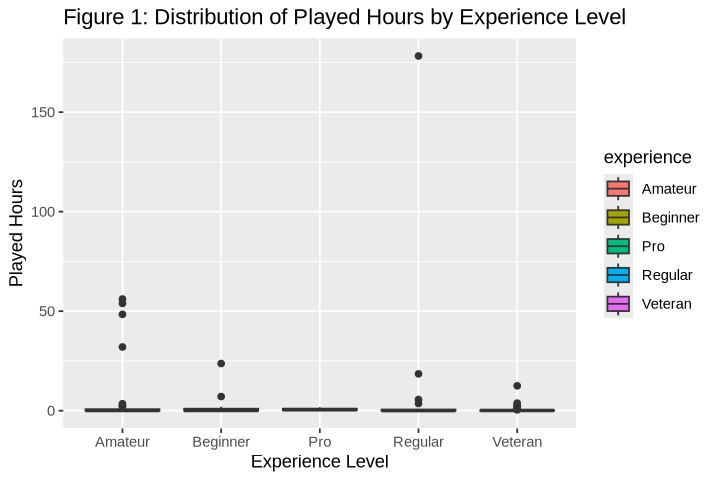

In [10]:
options(repr.plot.width = 6, repr.plot.height = 4)
experience_plot <- players_training|>
ggplot(aes(x = experience, y = played_hours, fill = experience)) +
  geom_boxplot() +
  labs(x = "Experience Level", y = "Played Hours") +
  ggtitle("Figure 1: Distribution of Played Hours by Experience Level")
experience_plot

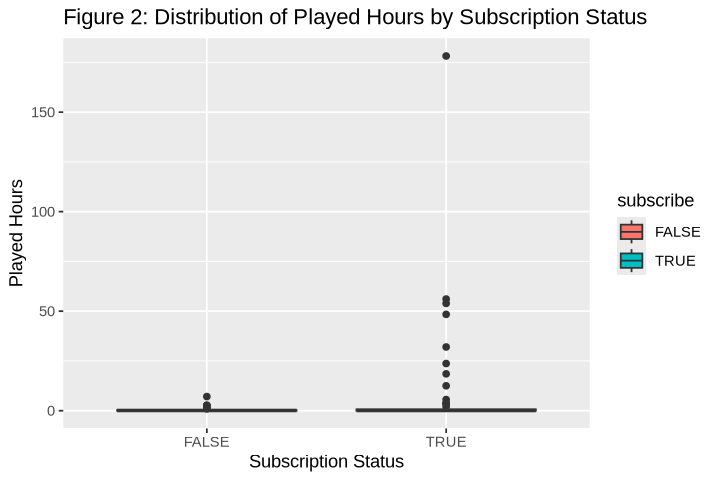

In [11]:
options(repr.plot.width = 6, repr.plot.height = 4)
subscription_status_plot <- players_training|>
ggplot(aes(x = subscribe, y = played_hours, fill = subscribe)) +
  geom_boxplot() +
  labs(x = "Subscription Status", y = "Played Hours") +
  ggtitle("Figure 2: Distribution of Played Hours by Subscription Status")
subscription_status_plot

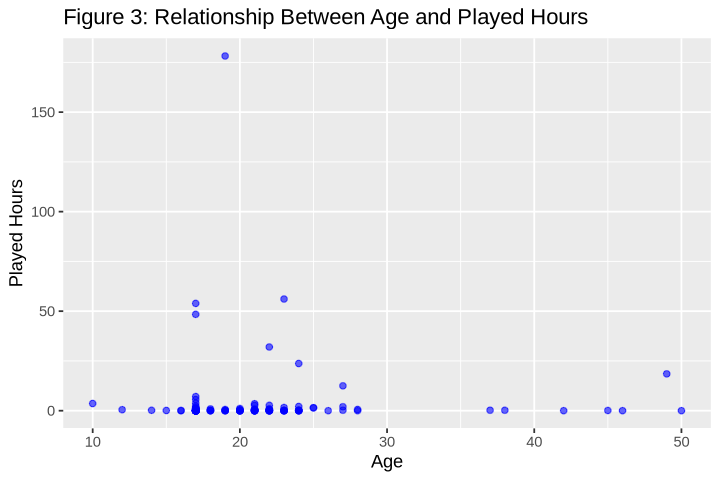

In [18]:
Age_plot <- players_training |>
ggplot(aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.6, color = "blue") +
  labs(x = "Age", y = "Played Hours") +
  ggtitle("Figure 3: Relationship Between Age and Played Hours")
Age_plot

.pred,played_hours,experience,subscribe,Age
<dbl>,<dbl>,<fct>,<lgl>,<dbl>
1.556185,30.3,Pro,TRUE,9
1.642126,3.8,Veteran,TRUE,17
-1.532022,0.0,Veteran,FALSE,17
⋮,⋮,⋮,⋮,⋮
-1.465589,0.3,Veteran,FALSE,22
2.530445,0.0,Amateur,FALSE,17
2.530445,2.3,Amateur,FALSE,17


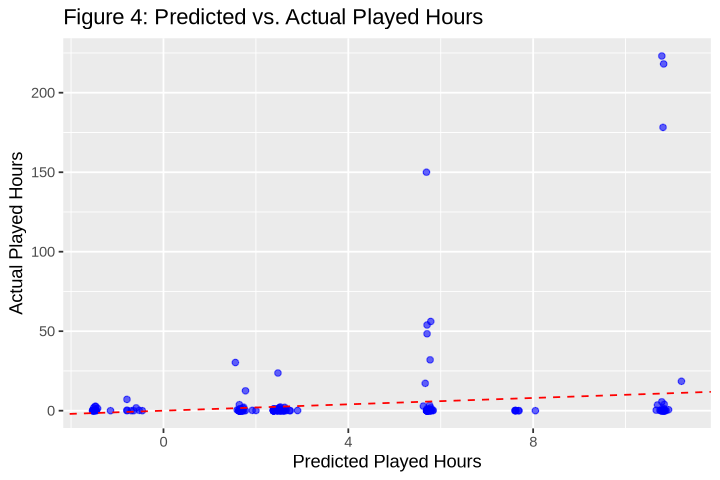

In [20]:
predicted_values <- players_fit |>
  predict(players) |>
  bind_cols(players) 
predicted_values

predicted_vs_actual_plot <- ggplot(predicted_values, aes(x = .pred, y = played_hours)) +
  geom_point(alpha = 0.6, color = "blue") +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
  labs(x = "Predicted Played Hours", y = "Actual Played Hours", color =  ) +
  ggtitle("Figure 4: Predicted vs. Actual Played Hours") 
predicted_vs_actual_plot